In [22]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm.auto import trange, tqdm
import seaborn as sns
from scipy.stats import spearmanr
import scipy.stats as stats
from collections import defaultdict

import sys
import os 

sys.path.append(os.path.abspath('../src'))

from util import letter_subplots, model

sns.set(context='paper', style='ticks', font_scale=1)
sns.set_palette('colorblind')

  0%|          | 0/1000 [00:00<?, ?it/s]

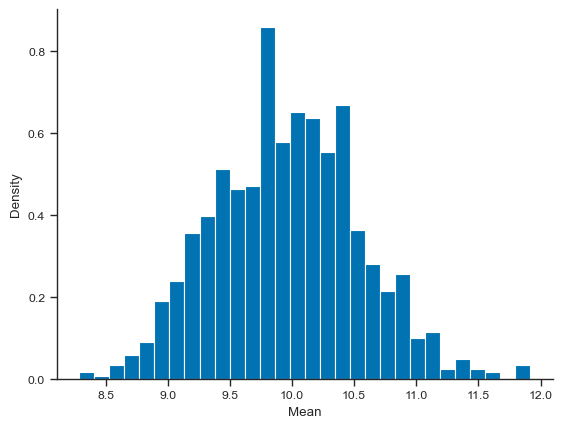

In [2]:
# plot distribution of means of 1000 samples of size 100 from uniform(0, 20)
means = []
for _ in trange(1000):
    means.append(np.mean(np.random.uniform(0, 20, 100)))

plt.hist(means, bins=30, density=True)
plt.xlabel('Mean')
plt.ylabel('Density')
sns.despine()
plt.show()

In [5]:
out, wm_m, freq_m = model(selection=0.5, mutation_rate=0.5, detailed=True, n_meanings=100)

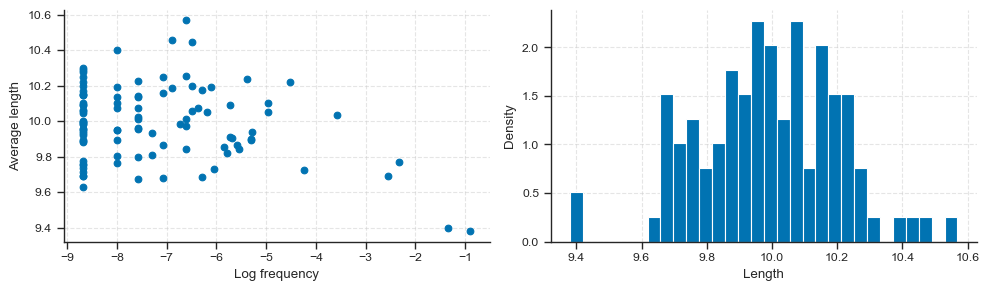

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# First subplot: Scatter plot of np.log(freq_m) vs. np.mean(wm_m, axis=0)
axes[0].scatter(np.log(freq_m), np.mean(wm_m, axis=0))
axes[0].set_xlabel('Log frequency')
axes[0].set_ylabel('Average length')
axes[0].grid(alpha=0.5, linestyle='--')

# Second subplot: Density plots
axes[1].grid(alpha=0.5, linestyle='--')
axes[1].hist(np.mean(wm_m, axis=0), bins=30, density=True, alpha=1)
# axes[1].hist(np.random.uniform(0,20, 100), bins=30, density=True, alpha=1)
# sns.kdeplot(np.random.gamma(shape=9, scale=0.5, size=10000), label='gamma sample', linewidth=2, ax=axes[1])
axes[1].set_xlabel('Length')
axes[1].set_ylabel('Density')

sns.despine()

# Show plot
plt.tight_layout()
plt.show()

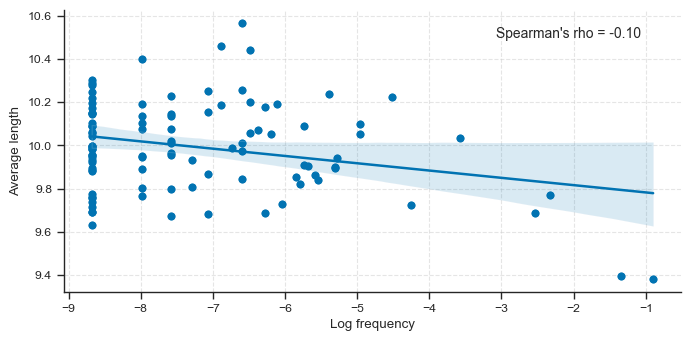

In [7]:
plt.figure(figsize=(7, 3.5))
plt.scatter(np.log(freq_m), np.mean(wm_m, axis=0))
sns.regplot(x=np.log(freq_m), y=np.mean(wm_m, axis=0))
## add spearman correlation     
plt.text(0.7, 0.9, f"Spearman's rho = {spearmanr(freq_m, np.mean(wm_m, axis=0)).correlation:.2f}", 
         transform=plt.gca().transAxes, fontsize=10)
plt.xlabel('Log frequency')
plt.ylabel('Average length')
sns.despine()
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
# Save the figure in png for word
plt.savefig('../figures/scatterplot_one_run.png')
# Save the figure in pdf for print
plt.savefig('../figures/scatterplot_one_run.pdf')
plt.show()

In [8]:
outs = []
wm_ms = []

for _ in trange(20):
    out, wm_m, _ = model(selection=0.5, mutation_rate=0.5, detailed=True)
    outs.append(out)
    wm_ms.append(wm_m)

  0%|          | 0/20 [00:00<?, ?it/s]

In [9]:
# plt.hist(np.random.choice(wm_ms[0].flatten(), size=1000, replace=False), alpha=0.1, color='black', bins=100, label='Model output')
# # kdeplot with counts
# plt.hist(np.random.choice(wm_ms[0].flatten(), size=1000, replace=False), alpha=0.1, color='red', bins=100, label='Model output')
# # kdeplot(np.random.normal(4, 1, 10000))
# plt.show()

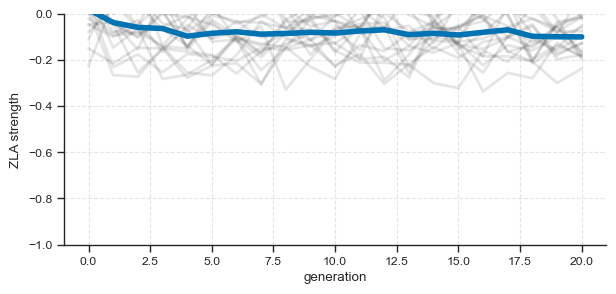

In [10]:
# plot out
plt.figure(figsize=(7, 3))
for _ in outs:
    plt.plot(_, alpha=0.1, color='black', linewidth=2)
plt.plot(np.mean(outs, axis=0),linewidth=4, alpha=1)
plt.xlabel('generation')
plt.ylabel('ZLA strength')
plt.ylim(-1, 0)
# plt.xlim(0, 20)
# make integer ticks
# plt.xticks(np.arange(0, 101, 2))
plt.grid(alpha=0.5, linestyle='--')
sns.despine()
plt.show()

In [11]:
selections = np.linspace(0.01, 1, 11)
mutation_rates = np.linspace(0.01, 1, 11)

results = np.zeros((len(selections), len(mutation_rates)))

# use tqdm
for i in trange(len(selections)):
    for j in range(len(mutation_rates)):
        res = []
        for _ in range(100):
            res.append(model(selections[i], mutation_rates[j]))

        results[i, j] = np.mean(res)

  0%|          | 0/11 [00:00<?, ?it/s]

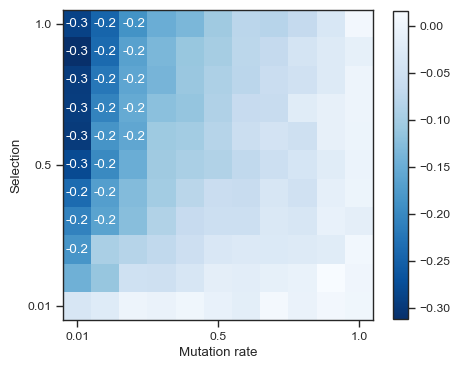

In [12]:
# plot the heatmap, but color cells if they are in between 0.1 and 0.5
plt.figure(figsize=(5, 5))
plt.imshow(results, cmap='Blues_r', interpolation=None)
plt.xlabel('Mutation rate')
plt.ylabel('Selection')
# add xticks and yticks but display every 5th value
plt.xticks(np.arange(len(mutation_rates))[::5], np.round(mutation_rates[::5], 2))
plt.yticks(np.arange(len(selections))[::5], np.round(selections[::5], 2))
# reverse y axis ticks
plt.gca().invert_yaxis()
# small colorbar
plt.colorbar(shrink=0.8)
for i in range(len(selections)):
    for j in range(len(mutation_rates)):
        if  -0.107 >= np.round(results[i, j], 1) >= -0.466:
            plt.text(j, i, np.round(results[i, j], 1), ha='center', va='center', color='white')
plt.show()

In [27]:
n_agents_ = [10, 100, 1000, 10000]
n_meaning_ = [10, 100, 1000, 10000]

num_heatmaps = 100
results_all = np.zeros((num_heatmaps, len(n_agents_), len(n_meaning_)))

for k in tqdm(range(num_heatmaps)):
    for i in range(len(n_agents_)):
        for j, n_meaning in enumerate(n_meaning_):
            results_all[k, i, j] = model(0.5, 0.5, n_meanings=n_meaning, n_agents=n_agents_[i])

  0%|          | 0/100 [00:00<?, ?it/s]

In [14]:

results_avg = np.mean(results_all, axis=0)

In [15]:
num_of_interactions = [10, 100, 1000, 10000, 100000]
 
results__ = defaultdict(list)
for i in trange(len(num_of_interactions)):
    for _ in range(100):
        results__[i].append(model(0.5, 0.5, num_encounters=num_of_interactions[i]))

  0%|          | 0/5 [00:00<?, ?it/s]

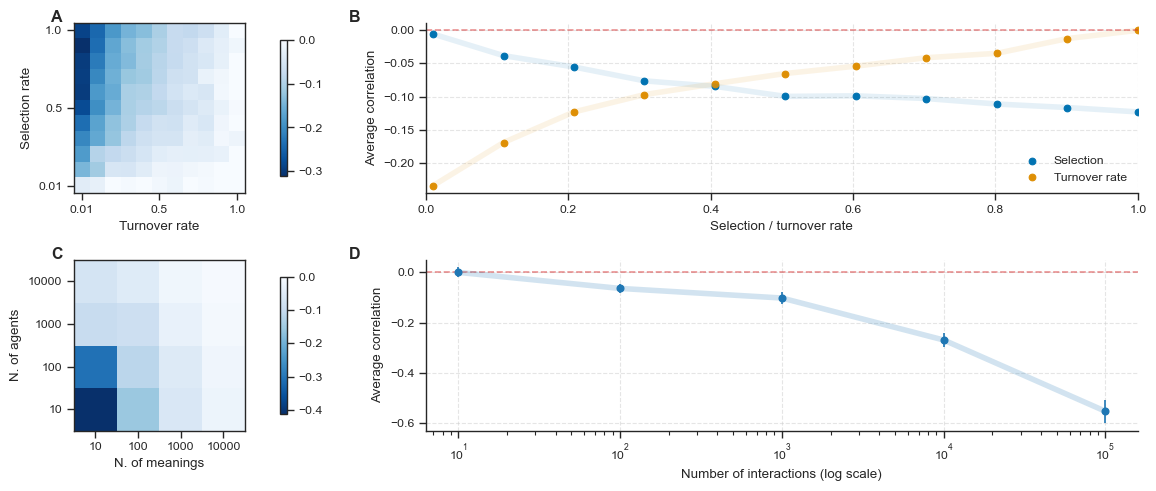

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 5))
letter_subplots(yoffset=1.03)

# Subplot 1: Heatmap
im1 = ax1.imshow(results, cmap='Blues_r', vmax=0)
ax1.set_xlabel('Turnover rate')
ax1.set_ylabel('Selection rate')
ax1.set_xticks(np.arange(len(mutation_rates))[::5])
ax1.set_xticklabels(np.round(mutation_rates[::5], 2))
ax1.set_yticks(np.arange(len(selections))[::5])
ax1.set_yticklabels(np.round(selections[::5], 2))
ax1.invert_yaxis()
fig.colorbar(im1, ax=ax1, shrink=0.8)

# Subplot 2: Scatter plot
ax2.scatter(selections, np.mean(results, axis=1), label='Selection')
ax2.plot(selections, np.mean(results, axis=1), alpha=0.1, linewidth=4)
ax2.scatter(mutation_rates, np.mean(results, axis=0), label='Turnover rate')
ax2.plot(mutation_rates, np.mean(results, axis=0), alpha=0.1, linewidth=4)
ax2.set_xlabel('Selection / turnover rate')
ax2.set_ylabel('Average correlation')
ax2.axhline(0, color='tab:red', linestyle='--', alpha=0.5)
ax2.legend(frameon=False)
sns.despine(ax=ax2)
ax2.grid(alpha=0.5, linestyle='--')
ax2.set_xlim(0, 1)

# Subplot 3: Heatmap
im2 = ax3.imshow(results_avg, cmap='Blues_r', vmax=0)
ax3.set_xlabel('N. of meanings')
ax3.set_ylabel('N. of agents')
ax3.set_xticks(np.arange(len(n_meaning_)))
ax3.set_xticklabels(n_meaning_)
ax3.set_yticks(np.arange(len(n_agents_)))
ax3.set_yticklabels(n_agents_)
ax3.invert_yaxis()
fig.colorbar(im2, ax=ax3, shrink=0.8)

# Subplot 4: Mean per number of interactions
means = [np.mean(results__[i]) for i in range(len(num_of_interactions))]
sems = [stats.sem(results__[i]) for i in range(len(num_of_interactions))]
ci_multiplier = stats.t.ppf(0.975, [len(results__[i])-1 for i in range(len(num_of_interactions))])
ci = [sem * multiplier for sem, multiplier in zip(sems, ci_multiplier)]
ax4.axhline(0, color='tab:red', linestyle='--', alpha=0.5)
ax4.plot(num_of_interactions, means, color='tab:blue', linewidth=4, alpha=0.2)
ax4.errorbar(num_of_interactions, means, yerr=ci, fmt='o', color='tab:blue')
ax4.grid(alpha=0.5, linestyle='--')
ax4.set_xticks(num_of_interactions)
ax4.set_xticklabels([str(i) for i in num_of_interactions])
ax4.set_xscale('log')
sns.despine(ax=ax4)
ax4.set_xlabel('Number of interactions (log scale)')
ax4.set_ylabel('Average correlation')

plt.tight_layout()
# Save the figure in png for word
plt.savefig('../figures/model_output_v2.png', dpi=300, bbox_inches='tight')
# Save the figure in pdf for print
plt.savefig('../figures/model_output_v2.pdf', bbox_inches='tight')
plt.show()